In [33]:
# importing necessary Python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import plotly.offline as pyoff
import plotly.graph_objs as go 
#import plotly.figure_factory as ff
#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import time
import sys
!{sys.executable} -m pip install xgboost
import xgboost
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv("PMGOpportunitiesprofile.csv")

In [35]:
df.rename(columns={'Account ID':'AccountID','Created Date':'Date', 'First Account Owner Role':'FirstOwnerRole','Opportunity Owner':'OpportunityOwner','Owner Role':'OwnerRole'}, inplace=True)
df.head()


,OwnerRole,OpportunityOwner,Registered Company Name,Stage,Success,OpportunityNumber,Fiscal Period,Date,Lost Reason,Reason,...,OpportunityID,FirstAccountOwner,FirstOwnerRole,utm_source,Last Successful Opportunity Create Date,Created Date/Time,AccountID,OpportunityCount,SuccessOppCountBefore,lifetimeSuccessfulOppCount
0,Inside Sales,Noel Karkada,0.3,Lost,0,1,Q1-2022,03-02-2022,All SKUs rejected,All SKUs rejected,...,0065g00000Ea0GZ,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
1,FoS Chennai,Joel Biju,0.3,Lost,0,2,Q1-2022,18-02-2022,All SKUs rejected,All SKUs rejected,...,0065g00000Ea5dx,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
2,FoS Chennai,Joel Biju,0.3,Lost,0,3,Q2-2022,11-04-2022,All SKUs rejected,All SKUs rejected,...,0065g00000EaODp,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
3,FoS Chennai,Joel Biju,0.3,Lost,0,4,Q2-2022,07-05-2022,All SKUs rejected,All SKUs rejected,...,0065g00000EaXSK,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
4,Inside Sales,Srushti Sindagi,0.3,Lost,0,5,Q3-2022,27-06-2022,Price discovery,Price discovery,...,0065g00000LyYWk,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0


In [36]:
df.head()

,OwnerRole,OpportunityOwner,Registered Company Name,Stage,Success,OpportunityNumber,Fiscal Period,Date,Lost Reason,Reason,...,OpportunityID,FirstAccountOwner,FirstOwnerRole,utm_source,Last Successful Opportunity Create Date,Created Date/Time,AccountID,OpportunityCount,SuccessOppCountBefore,lifetimeSuccessfulOppCount
0,Inside Sales,Noel Karkada,0.3,Lost,0,1,Q1-2022,03-02-2022,All SKUs rejected,All SKUs rejected,...,0065g00000Ea0GZ,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
1,FoS Chennai,Joel Biju,0.3,Lost,0,2,Q1-2022,18-02-2022,All SKUs rejected,All SKUs rejected,...,0065g00000Ea5dx,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
2,FoS Chennai,Joel Biju,0.3,Lost,0,3,Q2-2022,11-04-2022,All SKUs rejected,All SKUs rejected,...,0065g00000EaODp,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
3,FoS Chennai,Joel Biju,0.3,Lost,0,4,Q2-2022,07-05-2022,All SKUs rejected,All SKUs rejected,...,0065g00000EaXSK,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
4,Inside Sales,Srushti Sindagi,0.3,Lost,0,5,Q3-2022,27-06-2022,Price discovery,Price discovery,...,0065g00000LyYWk,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0


In [37]:
df.Date = pd.to_datetime(df.Date)
df.head()

,OwnerRole,OpportunityOwner,Registered Company Name,Stage,Success,OpportunityNumber,Fiscal Period,Date,Lost Reason,Reason,...,OpportunityID,FirstAccountOwner,FirstOwnerRole,utm_source,Last Successful Opportunity Create Date,Created Date/Time,AccountID,OpportunityCount,SuccessOppCountBefore,lifetimeSuccessfulOppCount
0,Inside Sales,Noel Karkada,0.3,Lost,0,1,Q1-2022,2022-03-02,All SKUs rejected,All SKUs rejected,...,0065g00000Ea0GZ,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
1,FoS Chennai,Joel Biju,0.3,Lost,0,2,Q1-2022,2022-02-18,All SKUs rejected,All SKUs rejected,...,0065g00000Ea5dx,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
2,FoS Chennai,Joel Biju,0.3,Lost,0,3,Q2-2022,2022-11-04,All SKUs rejected,All SKUs rejected,...,0065g00000EaODp,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
3,FoS Chennai,Joel Biju,0.3,Lost,0,4,Q2-2022,2022-07-05,All SKUs rejected,All SKUs rejected,...,0065g00000EaXSK,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
4,Inside Sales,Srushti Sindagi,0.3,Lost,0,5,Q3-2022,2022-06-27,Price discovery,Price discovery,...,0065g00000LyYWk,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0


In [38]:
ctm_state_df = df.groupby(['AccountID','State']).count().reset_index()

ctm_state_df = ctm_state_df.groupby('State')['AccountID'].count().reset_index().sort_values(
    by=['AccountID'], ascending=False)

# Create a new column, Percentage to calculate the customer representation in percentage
ctm_state_df['Percentage']= np.round(ctm_state_df.AccountID / ctm_state_df.AccountID.sum() * 100, 2)

ctm_state_df.head(40)

,State,AccountID,Percentage
3,MAHARASHTRA,3147,36.74
5,TAMIL NADU,1928,22.51
1,GUJARAT,1138,13.29
2,KARNATAKA,1123,13.11
4,OTHERS,591,6.90
6,TELANGANA,570,6.65
0,DELHI,69,0.81


In [39]:
#Random Splitting of train and test data
features = df[['OpportunityNumber', 'SuccessOppCountBefore','OpportunityCount', 'OwnerRole', 'FirstOwnerRole', 'State']]

In [40]:

features.loc[:,'OwnerRole'] = LabelEncoder().fit_transform(df.loc[:,'OwnerRole'].copy())
features.loc[:,'FirstOwnerRole'] = LabelEncoder().fit_transform(df.loc[:,'FirstOwnerRole'].copy())
features.loc[:,'State'] = LabelEncoder().fit_transform(df.loc[:,'State'].copy())

Success = LabelEncoder().fit_transform(df['Success'])
features.head()

,OpportunityNumber,SuccessOppCountBefore,OpportunityCount,OwnerRole,FirstOwnerRole,State
0,1,0,5,26,32,5
1,2,0,5,17,32,5
2,3,0,5,17,32,5
3,4,0,5,17,32,5
4,5,0,5,26,32,5


In [41]:
print(list(features.columns))

['OpportunityNumber', 'SuccessOppCountBefore', 'OpportunityCount', 'OwnerRole', 'FirstOwnerRole', 'State']


In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    Success, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [43]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.8440533195289246
Precision: 0.6468531468531469
Recall: 0.269482884195193
fbeta: 0.8130222391045462


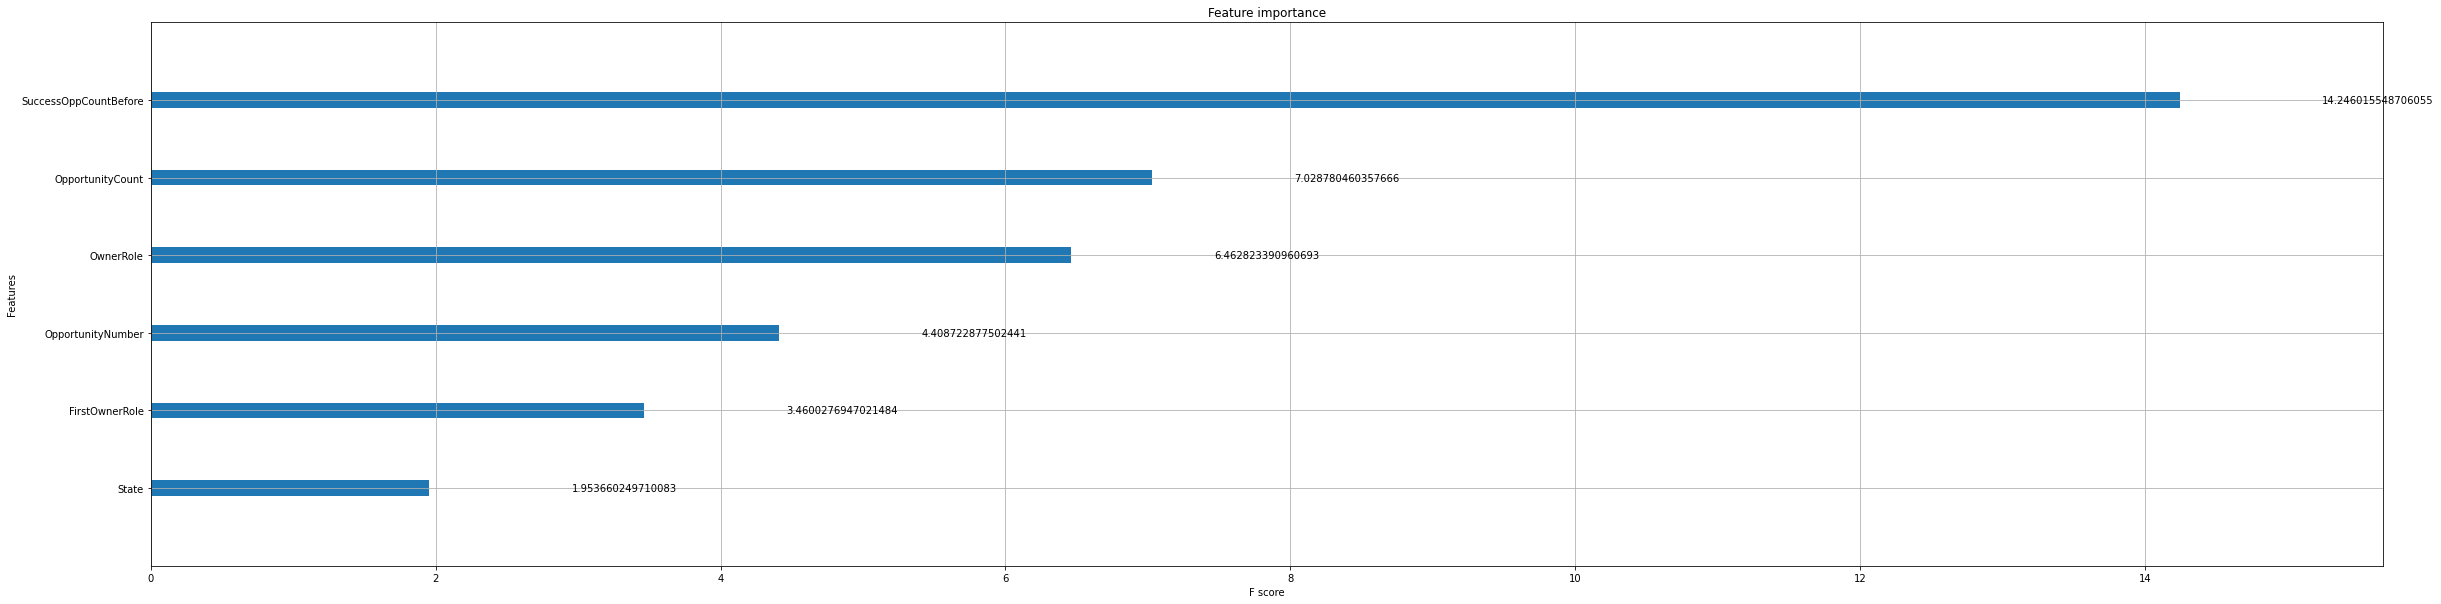

In [45]:
xgboost.plot_importance(model, max_num_features=10, importance_type ='gain')
plt.rcParams['figure.figsize'] = (40,10)
plt.show()

In [46]:
#Using 2022 data as train and 2023 data as test
train= df[df['Date']. dt. strftime('%Y')=='2022']

In [47]:
train.head()

,OwnerRole,OpportunityOwner,Registered Company Name,Stage,Success,OpportunityNumber,Fiscal Period,Date,Lost Reason,Reason,...,OpportunityID,FirstAccountOwner,FirstOwnerRole,utm_source,Last Successful Opportunity Create Date,Created Date/Time,AccountID,OpportunityCount,SuccessOppCountBefore,lifetimeSuccessfulOppCount
0,Inside Sales,Noel Karkada,0.3,Lost,0,1,Q1-2022,2022-03-02,All SKUs rejected,All SKUs rejected,...,0065g00000Ea0GZ,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
1,FoS Chennai,Joel Biju,0.3,Lost,0,2,Q1-2022,2022-02-18,All SKUs rejected,All SKUs rejected,...,0065g00000Ea5dx,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
2,FoS Chennai,Joel Biju,0.3,Lost,0,3,Q2-2022,2022-11-04,All SKUs rejected,All SKUs rejected,...,0065g00000EaODp,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
3,FoS Chennai,Joel Biju,0.3,Lost,0,4,Q2-2022,2022-07-05,All SKUs rejected,All SKUs rejected,...,0065g00000EaXSK,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0
4,Inside Sales,Srushti Sindagi,0.3,Lost,0,5,Q3-2022,2022-06-27,Price discovery,Price discovery,...,0065g00000LyYWk,Noel Karkada,Inside Sales Team,NaN,NaN,"09/01/2022, 9:26 am",0015g00000bVlqr,5,0,0


In [48]:
features1 = train[['OpportunityNumber', 'SuccessOppCountBefore','OpportunityCount', 'OwnerRole', 'FirstOwnerRole', 'State']]

In [49]:

features1.loc[:,'OwnerRole'] = LabelEncoder().fit_transform(train.loc[:,'OwnerRole'].copy())
features1.loc[:,'FirstOwnerRole'] = LabelEncoder().fit_transform(train.loc[:,'FirstOwnerRole'].copy())
features1.loc[:,'State'] = LabelEncoder().fit_transform(train.loc[:,'State'].copy())

Success1 = LabelEncoder().fit_transform(train['Success'])
features1.head()

,OpportunityNumber,SuccessOppCountBefore,OpportunityCount,OwnerRole,FirstOwnerRole,State
0,1,0,5,18,23,5
1,2,0,5,12,23,5
2,3,0,5,12,23,5
3,4,0,5,12,23,5
4,5,0,5,18,23,5


In [50]:
test = df[df['Date'].dt.strftime('%Y')=='2023']

In [51]:
features2 = test[['OpportunityNumber', 'SuccessOppCountBefore','OpportunityCount', 'OwnerRole', 'FirstOwnerRole', 'State']]

In [52]:
features2.loc[:,'OwnerRole'] = LabelEncoder().fit_transform(test.loc[:,'OwnerRole'].copy())
features2.loc[:,'FirstOwnerRole'] = LabelEncoder().fit_transform(test.loc[:,'FirstOwnerRole'].copy())
features2.loc[:,'State'] = LabelEncoder().fit_transform(test.loc[:,'State'].copy())

Success2 = LabelEncoder().fit_transform(test['Success'])
features2.head()

,OpportunityNumber,SuccessOppCountBefore,OpportunityCount,OwnerRole,FirstOwnerRole,State
7,1,0,3,26,34,3
8,2,0,3,26,34,3
9,3,0,3,26,34,3
11,1,0,1,24,31,7
13,1,0,1,24,31,3


In [53]:
X_train = features1
X_test = features2
y_train = Success1
y_test = Success2

In [54]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.782285845517875
Precision: 0.34986474301172227
Recall: 0.3562901744719926
fbeta: 0.7835571021254074


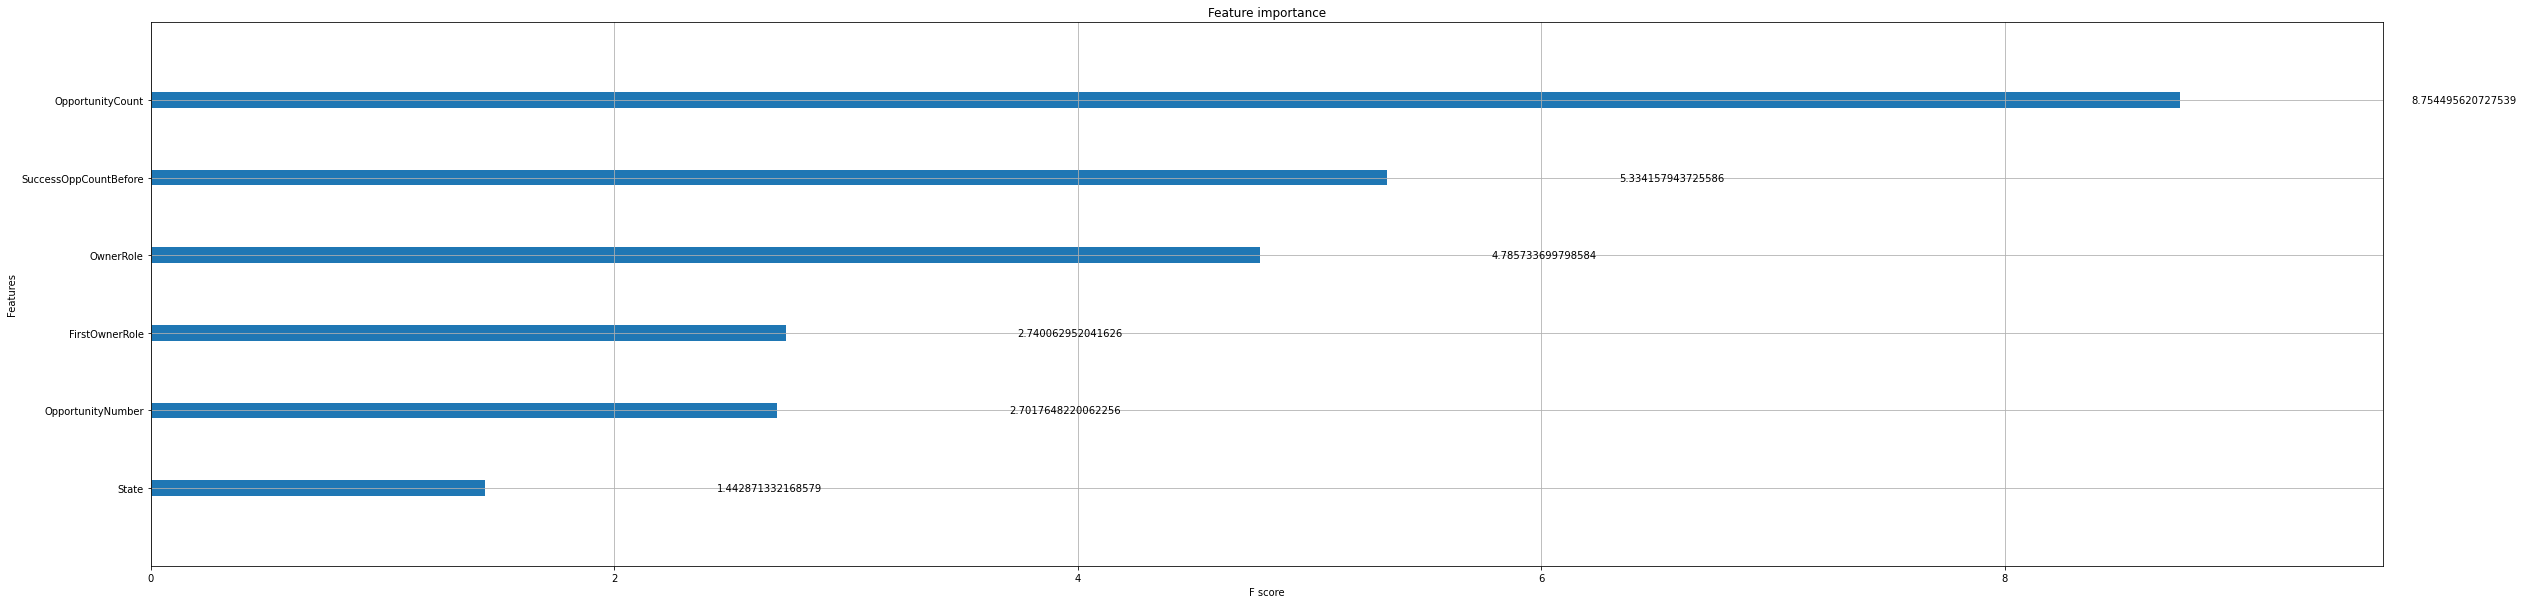

In [56]:
xgboost.plot_importance(model, max_num_features=10, importance_type ='gain')
plt.rcParams['figure.figsize'] = (40,10)
plt.show()